In [12]:
import Makie
import CairoMakie

using ZebrafishHMM2023: ZebrafishHMM_G3_Sym_Full, ZebrafishHMM_G3_Sym,
    load_full_obs, load_behaviour_free_swimming_trajs, ATol, normalize_all!
using HiddenMarkovModels: baum_welch, logdensityof
using Distributions: Gamma
using Statistics: mean, std

In [2]:
full_trajs = load_full_obs(18);

In [4]:
hmm_full = ZebrafishHMM_G3_Sym_Full(;
    pinit_turn=rand(), transition_matrix=rand(3,3), σforw=0.1, turn=Gamma(1.5, 20.0),
    forward_displacement=Gamma(1.5, 1.2), turn_displacement=Gamma(1.5, 1.2),
    forward_interboutinterval=Gamma(1.5, 1.2), turn_interboutinterval=Gamma(1.5, 1.2),
    min_alpha=1.0
);
(hmm_full, lL_full) = baum_welch(hmm_full, full_trajs, length(full_trajs); max_iterations = 500, check_loglikelihood_increasing = false, atol = ATol(1e-7));

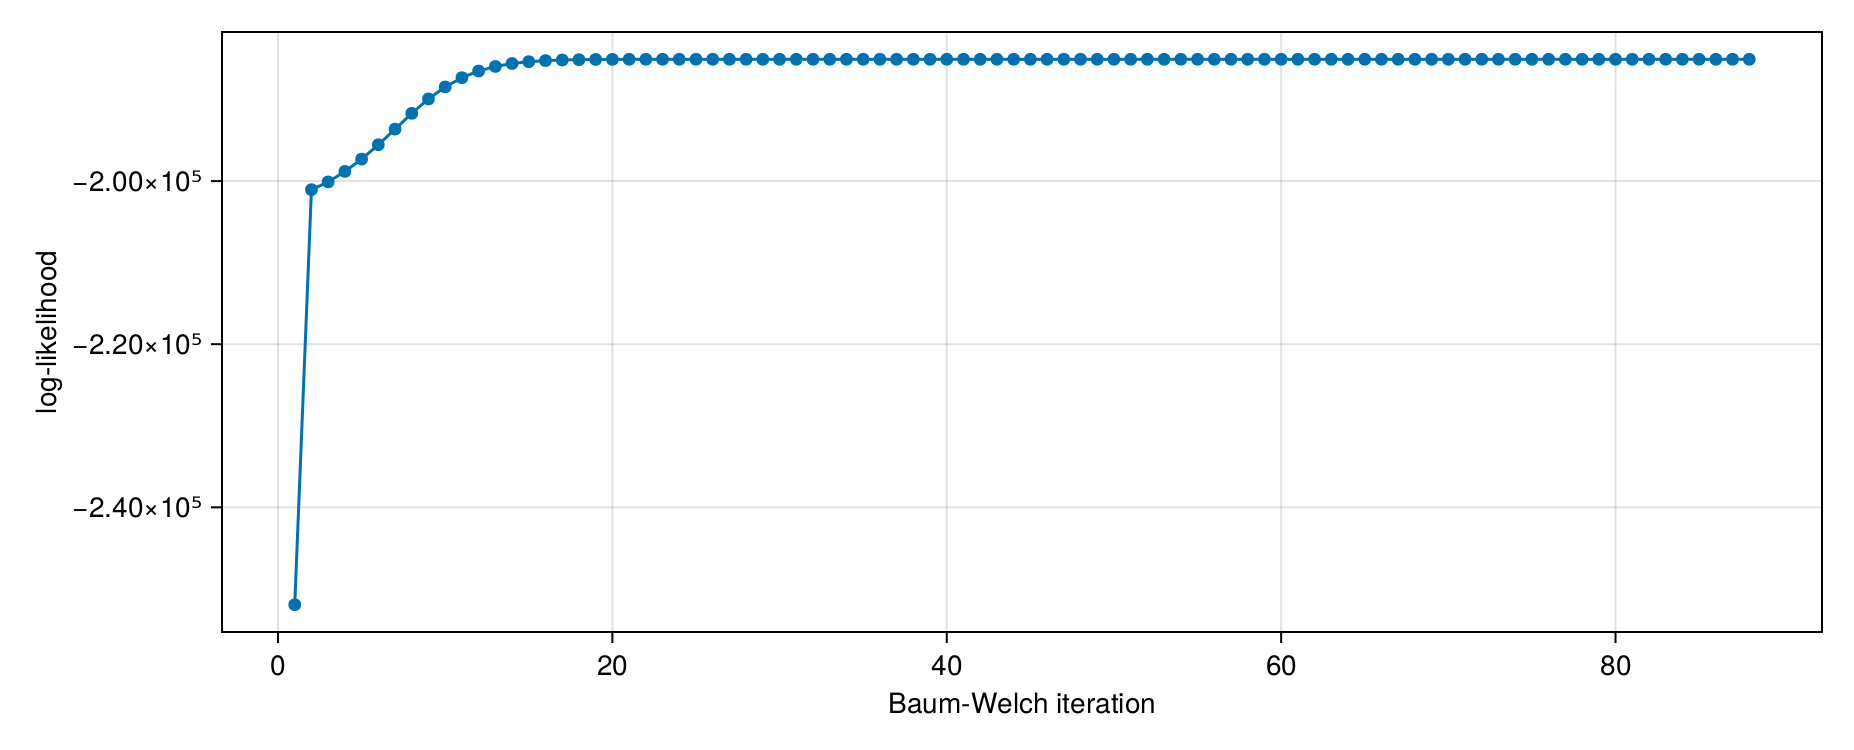

In [5]:
fig = Makie.Figure()
ax = Makie.Axis(fig[1,1], width=800, height=300, xlabel="Baum-Welch iteration", ylabel="log-likelihood")
Makie.scatterlines!(ax, lL_full)
Makie.resize_to_layout!(fig)
fig

In [15]:
# train on angles only
trajs_angles_only = load_behaviour_free_swimming_trajs(18);
trajs_angles_only = filter(traj -> all(!iszero, traj), trajs_angles_only)  # zeros give trouble sometimes
hmm_angles_only = normalize_all!(ZebrafishHMM_G3_Sym(rand(), rand(3,3), 1.0, Gamma(1.5, 20.0), 1.0));
(hmm_angles_only, lL) = baum_welch(
    hmm_angles_only, trajs_angles_only, length(trajs_angles_only); 
    max_iterations = 500, check_loglikelihood_increasing = false, atol = ATol(1e-6)
);

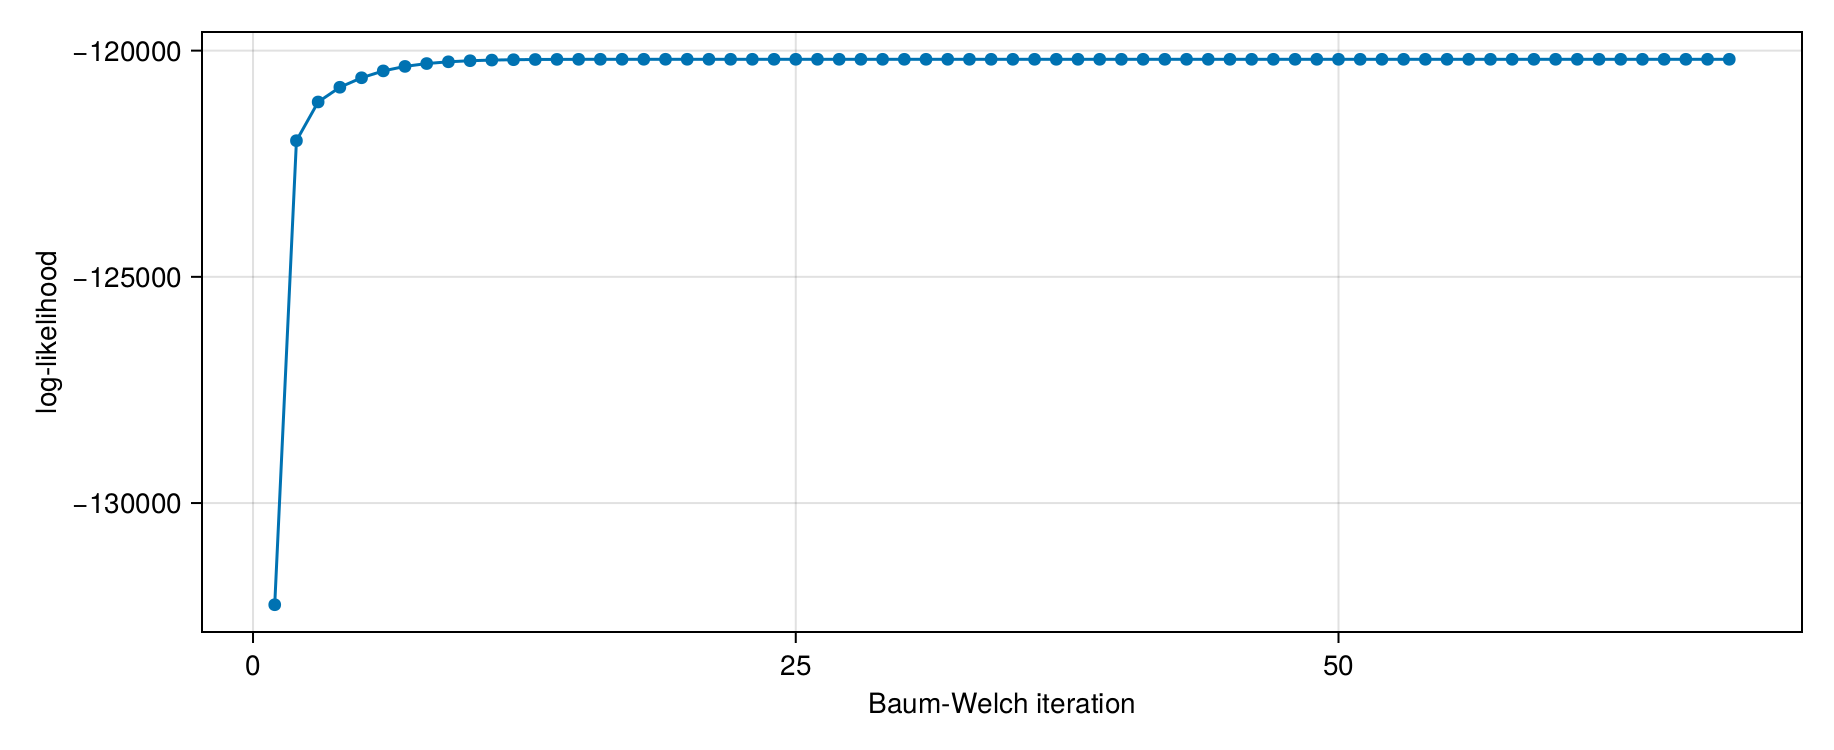

In [17]:
fig = Makie.Figure()
ax = Makie.Axis(fig[1,1], width=800, height=300, xlabel="Baum-Welch iteration", ylabel="log-likelihood")
Makie.scatterlines!(ax, lL)
Makie.resize_to_layout!(fig)
fig

In [19]:
hmm_full.transition_matrix

3×3 Matrix{Float64}:
 0.730223  0.134889  0.134889
 0.454807  0.388232  0.156961
 0.454807  0.156961  0.388232

In [20]:
hmm_angles_only.transition_matrix

3×3 Matrix{Float64}:
 0.670732  0.164634  0.164634
 0.334463  0.500006  0.165532
 0.334463  0.165532  0.500006

In [22]:
hmm_full.σforw, hmm_angles_only.σforw

(3.994450233648637, 2.712266243269263)

In [24]:
hmm_full.turn, hmm_angles_only.turn

(Gamma{Float64}(α=1.0, θ=21.157409690504878), Gamma{Float64}(α=1.0, θ=17.32283550740827))

In [26]:
mean(hmm_full.forward_displacement), std(hmm_full.forward_displacement)

(0.9833293259910207, 0.7117906362031265)

In [27]:
mean(hmm_full.turn_displacement), std(hmm_full.turn_displacement)

(1.0058492951249152, 0.6654936369301839)

In [28]:
mean(hmm_full.forward_interboutinterval), std(hmm_full.forward_interboutinterval)

(1.0997389246376867, 0.35773978701244863)

In [29]:
mean(hmm_full.turn_interboutinterval), std(hmm_full.turn_interboutinterval)

(2.7938102058073677, 2.71649567856678)